<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Work_Hour_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Work Hour Prediction**

In this we need to  predict the working hours per week at different locations with attributes such as workclass, education, marital-status, occupation capital-gain, capital-gain, capital-loss etc. to get the desired salary in a range.



We are going to solve this using various Machine learning algorithms.

Let us import all the necessary libraries.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K


In [4]:
data.shape

(18944, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,39.266470,164292.035156,9.479043,577.476510,33.082823,40.119299
std,13.395878,93425.986084,2.830047,2414.473217,248.521486,11.124649
min,14.000000,8019.000000,2.000000,-58.000000,-2.000000,1.000000
25%,28.000000,98530.750000,8.000000,-5.000000,0.000000,35.000000
50%,40.000000,152895.500000,9.000000,5.000000,0.000000,39.000000
75%,47.000000,215541.000000,12.000000,17.000000,0.000000,44.000000
max,99.000000,772988.000000,16.000000,16193.000000,2437.000000,102.000000


Let us check whether our data has any nan values.

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

We could see that our data is free of nan values.

**EXploratory Data Analysis**

Let us visualize and see our data

Our data has both numerical and categorical values. Let us split them and see how they are distributed.

In [8]:
num_data=[features for features in data.columns if data[features].dtype!='O']
print('Total No of Numerical Features: ',len(num_data))
data[num_data].head()

Total No of Numerical Features:  6


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,52,98926,9,-3,0,44
1,76,132607,12,7527,0,44
2,40,243258,13,19,0,57
3,76,181259,12,7720,0,44
4,36,115379,13,12,0,58


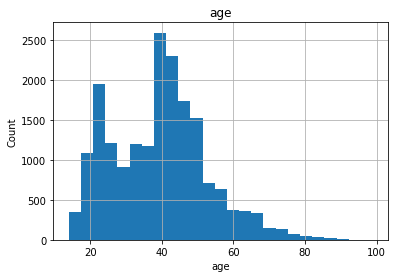

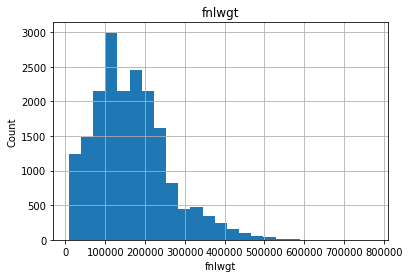

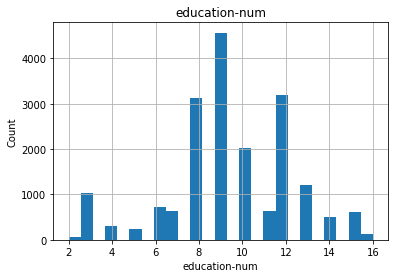

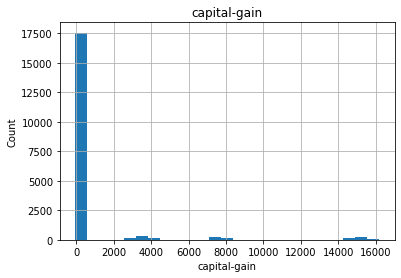

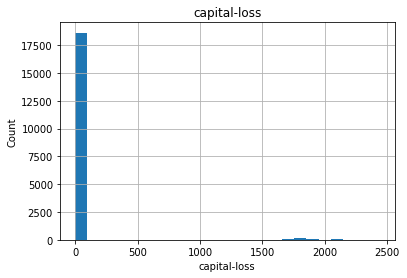

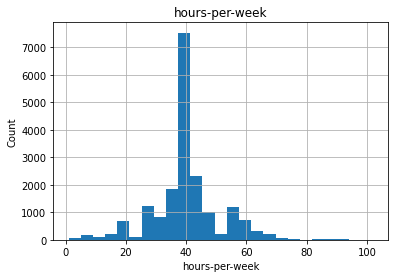

In [11]:
for feature in num_data:
  df=data.copy()
  df[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

In [12]:
cat_data=[features for features in data.columns if features not in num_data]
print('Total No of Categorical Features: ',len(cat_data))
data[cat_data].head()

Total No of Categorical Features:  9


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Private,HS-grad,Never-married,Other-service,Unmarried,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
2,Private,Bachelors,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,United-States,>50K
3,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
4,Self-emp-inc,Masters,Divorced,Exec-managerial,Not-in-family,White,Male,United-States,<=50K


In [13]:
for feature in cat_data:
  print('Feature: {} , No.of categories: {}'.format(feature,len(data[feature].unique())))

Feature: workclass , No.of categories: 8
Feature: education , No.of categories: 16
Feature: marital-status , No.of categories: 7
Feature: occupation , No.of categories: 14
Feature: relationship , No.of categories: 6
Feature: race , No.of categories: 5
Feature: sex , No.of categories: 2
Feature: native-country , No.of categories: 41
Feature: income , No.of categories: 2


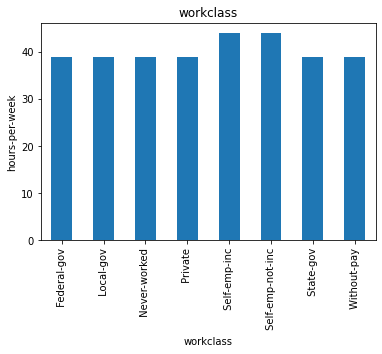

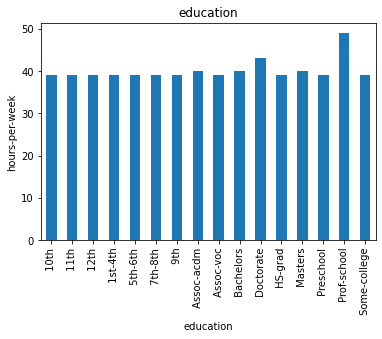

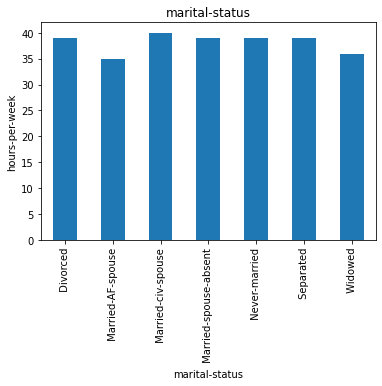

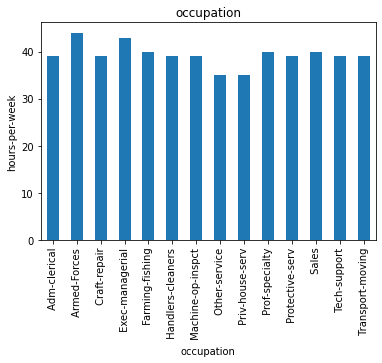

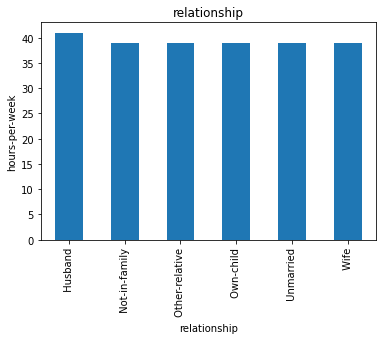

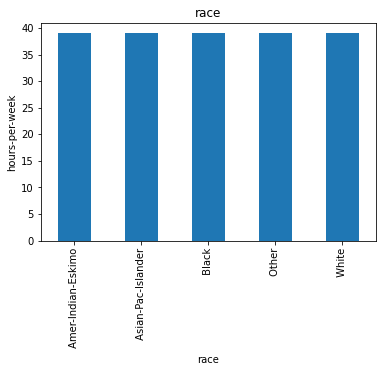

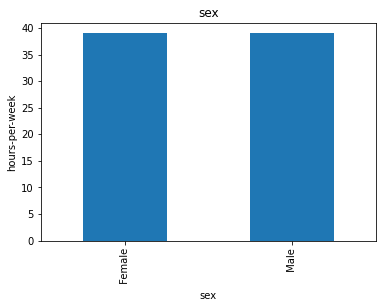

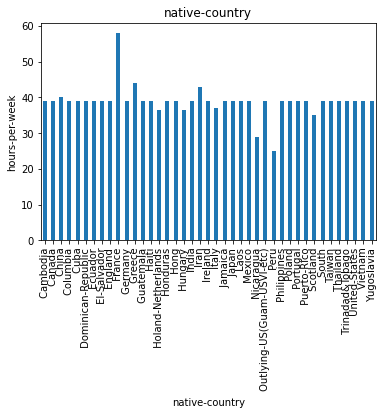

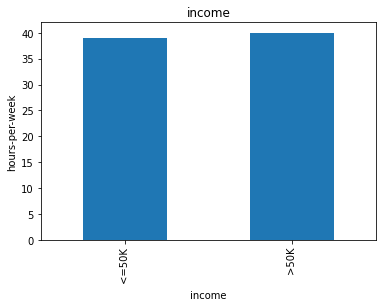

In [14]:
for feature in cat_data:
  df1=data.copy()
  df1.groupby(feature)['hours-per-week'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('hours-per-week')
  plt.title(feature)
  plt.show()


Let us find the correlation of our data.

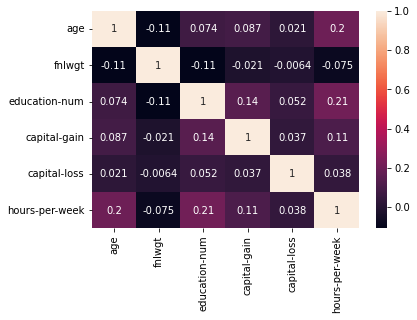

In [17]:
sns.heatmap(data.corr(),annot=True)

let us standardize all the numerical values using MinMax Scaler.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()

In [30]:
scaled_features=scaler.fit_transform(data[num_data])

In [32]:
scaled_data=pd.DataFrame(scaled_features,columns=data[num_data].columns)

In [33]:
scaled_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.447059,0.118837,0.500000,0.003384,0.00082,0.425743
1,0.729412,0.162867,0.714286,0.466741,0.00082,0.425743
2,0.305882,0.307514,0.785714,0.004738,0.00082,0.554455
3,0.729412,0.226467,0.714286,0.478617,0.00082,0.425743
4,0.258824,0.140346,0.785714,0.004307,0.00082,0.564356


Now let us convert all the categorical values into numerical using Label Encoder.

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder=LabelEncoder()

In [37]:
for features in data[cat_data].columns:
  data[features]=encoder.fit_transform(data[features])

In [38]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,3,98926,11,9,4,7,4,4,1,-3,0,44,38,0
1,76,5,132607,9,12,2,11,0,4,1,7527,0,44,38,1
2,40,3,243258,9,13,2,13,0,0,1,19,0,57,38,1
3,76,6,181259,9,12,2,9,0,4,1,7720,0,44,38,1
4,36,4,115379,12,13,0,3,1,4,1,12,0,58,38,0


In [39]:
data[num_data].columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [40]:
data.drop(columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],axis=1,inplace=True)

In [55]:
final_data=pd.concat([data,scaled_data],axis=1)

In [56]:
final_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,3,11,4,7,4,4,1,38,0,0.447059,0.118837,0.500000,0.003384,0.00082,0.425743
1,5,9,2,11,0,4,1,38,1,0.729412,0.162867,0.714286,0.466741,0.00082,0.425743
2,3,9,2,13,0,0,1,38,1,0.305882,0.307514,0.785714,0.004738,0.00082,0.554455
3,6,9,2,9,0,4,1,38,1,0.729412,0.226467,0.714286,0.478617,0.00082,0.425743
4,4,12,0,3,1,4,1,38,0,0.258824,0.140346,0.785714,0.004307,0.00082,0.564356


In [44]:
X=final_data.drop('hours-per-week',axis=1)
y=final_data['hours-per-week']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

**Using Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

In [58]:
model=lr.fit(X_train,y_train)

In [59]:
pred=model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
print('Mean Squarred Error : ',mean_squared_error(y_test,pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

Mean Squarred Error :  0.009604200027995852
Mean Absolute Error :  0.07021241528827318
RMSE:  0.09800102054568541


**Using SGD**

In [106]:
from sklearn.linear_model import SGDRegressor

In [107]:
sgd=SGDRegressor()

In [108]:
model_1=sgd.fit(X_train,y_train)

In [111]:
pred_1=model_1.predict(X_test)

In [112]:
print('Mean Squarred Error : ',mean_squared_error(y_test,pred_1))
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred_1))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred_1)))

Mean Squarred Error :  0.03607584863563302
Mean Absolute Error :  0.11249470435551838
RMSE:  0.18993643314444184


**Using XGboost**

In [115]:
from sklearn.model_selection import KFold

In [116]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)

In [113]:
import xgboost 

In [117]:
xgb=xgboost.XGBRegressor(cv=kf)

In [119]:
model_2=xgb.fit(X_train,y_train)

[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [120]:
pred_2=model_2.predict(X_test)

In [121]:
print('Mean Squarred Error : ',mean_squared_error(y_test,pred_2))
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred_2))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred_2)))

Mean Squarred Error :  0.009017156600714395
Mean Absolute Error :  0.067451731512252
RMSE:  0.09495870997814995
